##  Price Predictor 




In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv") 

In [3]:
housing.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     508 non-null    float64
 1   ZN       508 non-null    float64
 2   INDUS    508 non-null    float64
 3   CHAS     508 non-null    int64  
 4   NOX      508 non-null    float64
 5   RM       508 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      508 non-null    float64
 8   RAD      508 non-null    int64  
 9   TAX      508 non-null    int64  
 10  PTRATIO  508 non-null    float64
 11  B        508 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     508 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.7 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    473
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,3.599606,11.318898,11.139902,0.068898,0.554767,6.285136,68.639764,3.789735,9.515748,407.704724,18.465551,356.825610,12.631516,22.510827
std,8.587422,23.287303,6.846989,0.253530,0.115655,0.701686,28.113529,2.103254,8.706577,168.417848,2.166550,91.146638,7.135351,9.191089
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081960,0.000000,5.190000,0.000000,0.449000,5.886500,45.075000,2.100525,4.000000,279.000000,17.400000,375.472500,6.927500,16.950000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,77.700000,3.190950,5.000000,330.000000,19.100000,391.475000,11.330000,21.200000
75%,3.674808,12.500000,18.100000,0.000000,0.624000,6.626000,94.025000,5.141475,24.000000,666.000000,20.200000,396.232500,16.945000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

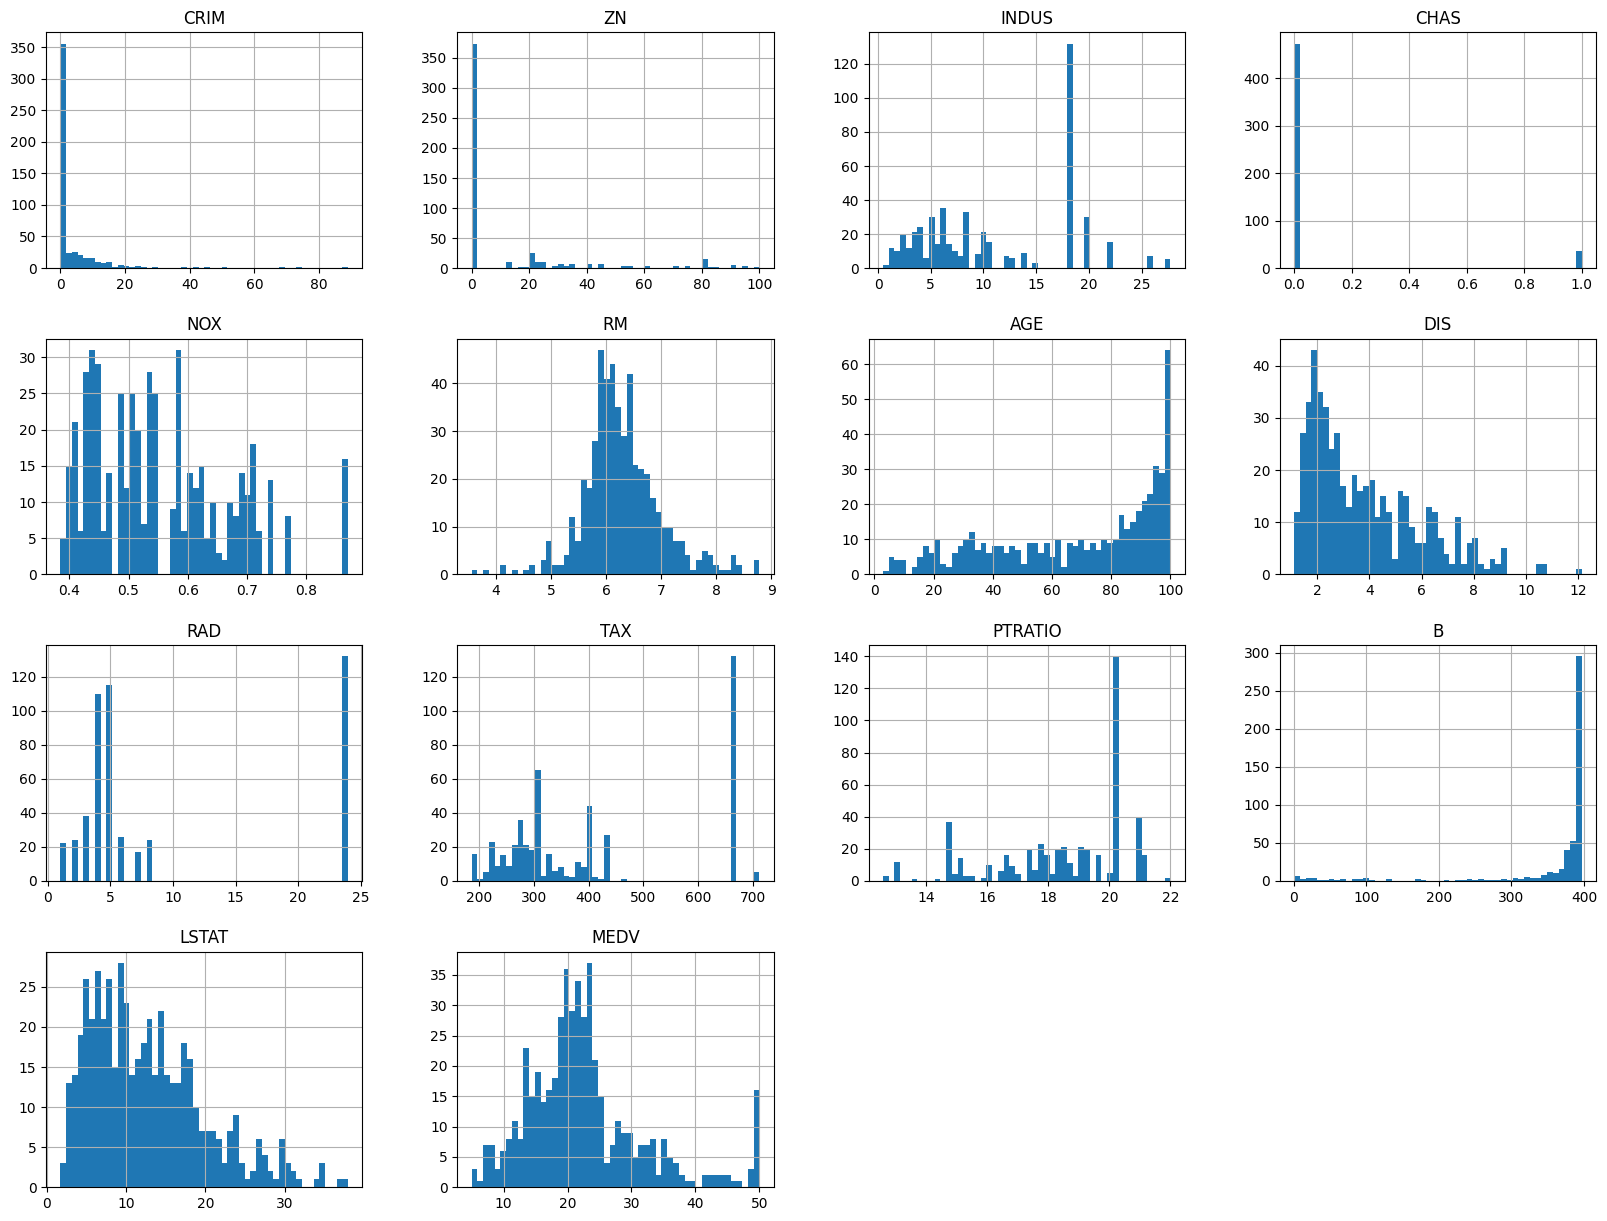

In [9]:
housing.hist(bins=50 , figsize=(20,15))

## TRAIN - TEST Splitting



In [10]:
## For Learning Purpose
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
##train_set , test_set = split_train_test(housing , 0.2)

In [12]:
## print(f"Rows in train set:{len(train_set)}\nRows in test set : {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size = 0.2, random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set:406
Rows in test set : 102



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 ,  random_state = 42)
for train_index , test_index in split.split(housing , housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    378
1     28
Name: count, dtype: int64

## Looking for Correlation

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.694737
ZN         0.360965
B          0.331854
DIS        0.250867
CHAS       0.175654
AGE       -0.377256
RAD       -0.378056
CRIM      -0.386672
NOX       -0.427113
TAX       -0.465407
INDUS     -0.483350
PTRATIO   -0.508543
LSTAT     -0.734204
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

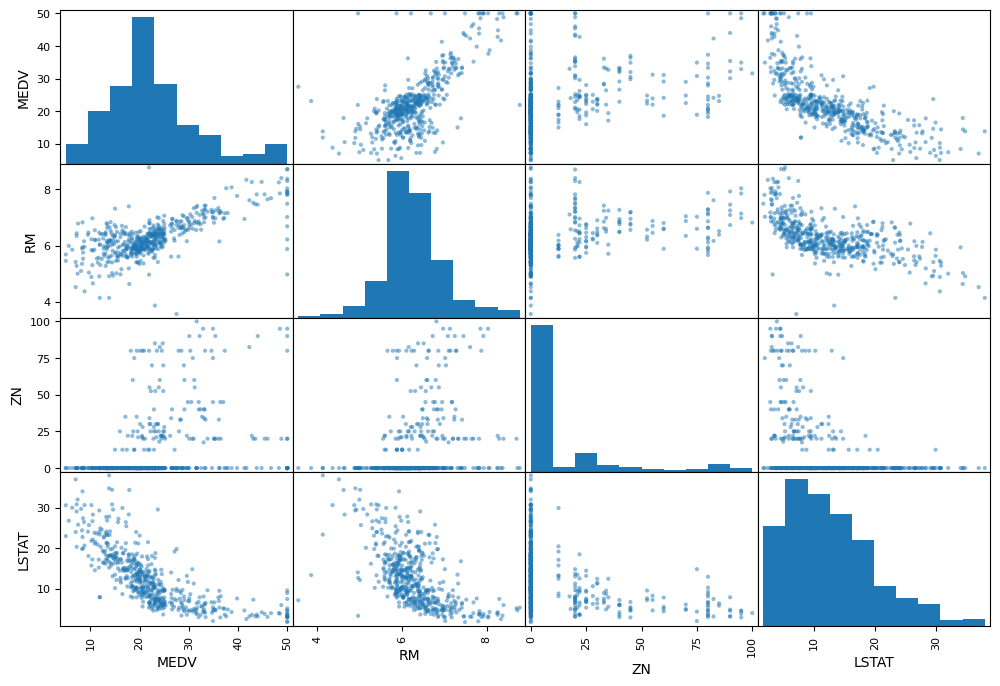

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV" , "RM" , "ZN","LSTAT"]
scatter_matrix(housing[attributes] , figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

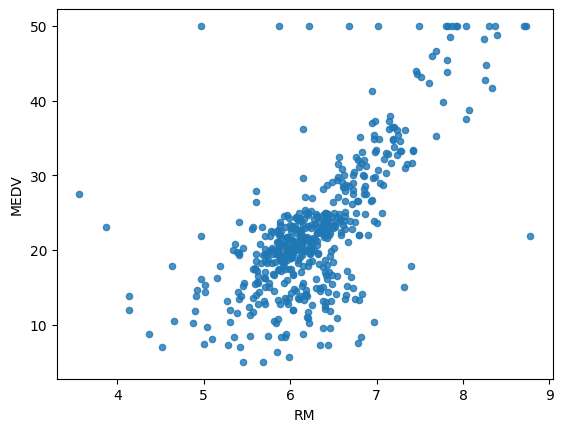

In [20]:
housing.plot(kind= "scatter" , x = "RM" , y = "MEDV" , alpha = 0.8)

## Trying out Attributes Combination

In [21]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.694737
ZN         0.360965
B          0.331854
DIS        0.250867
CHAS       0.175654
AGE       -0.377256
RAD       -0.378056
CRIM      -0.386672
NOX       -0.427113
TAX       -0.465407
INDUS     -0.483350
PTRATIO   -0.508543
TAXRM     -0.534659
LSTAT     -0.734204
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

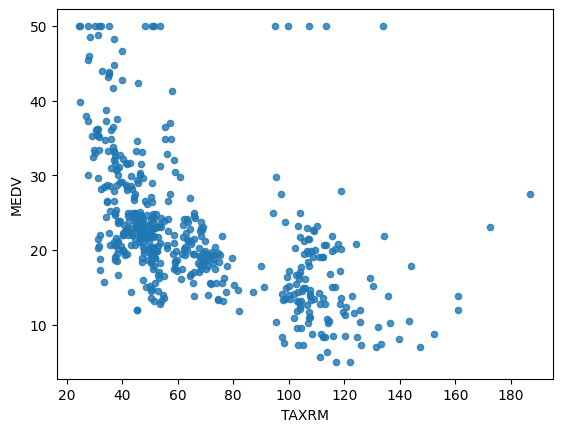

In [24]:
housing.plot(kind= "scatter" , x = "TAXRM" , y = "MEDV" , alpha = 0.8)

In [25]:
housing = strat_train_set.drop("MEDV" , axis = 1)
housing_lables = strat_train_set["MEDV"].copy()


## Scikit-learn Design

Primarily three types of objects

1. Estimators - It estimates some parameter based on a dataset . Eg imputer .
It has a fit method and transform method. Fit method = Fits the dataset and calculate internal parameters

2. Transformers - Transform method takes input and returns output based on the learning from fit() . It also has a convenience function called fit_transform() which fits and then transforms .

3. Predictors - LinearRegression model is a example of predictor . fit() and predict() are two common function . It also gives score() function which will evaluate the prediction.

## Feature Scaling 

Primarily, two types of feature scaling methods:
1. Min-Max scaling(Normalization)
    (value - min)/(max - min)
   
   Sklearn provides a class called MinMaxScaler for this

2. Standardization
   (value - mean)/standard Deviation

   Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy = "median")),
    ## ... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [27]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [28]:
housing_num_tr.shape

(406, 13)

## Selecting a desired model for Dragon Real Estates

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
##model = DecisionTreeRegressor()
##model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr , housing_lables)

RandomForestRegressor()

In [30]:
some_data = housing.iloc[:5]

In [31]:
some_labels = housing_lables.iloc[:5]

In [32]:
prepared_data = my_pipeline.transform(some_data)

In [33]:
model.predict(prepared_data)

array([20.083, 23.897, 21.386, 15.294, 21.36 ])

In [34]:
list(some_labels)

[20.1, 22.0, 21.0, 15.6, 21.7]

## Evaluating the model

In [35]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_lables , housing_predictions)
rmse = np.sqrt(mse)


In [36]:
rmse ## not a good model , it happened due to overfitting , it has learned noise not trend

1.2746676906844685

- ## Using better evaluation technique - Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr , housing_lables , scoring = "neg_mean_squared_error",cv =10)
rmse_scores = np.sqrt(-scores)


In [38]:
rmse_scores

array([2.98581907, 2.9917552 , 5.24357315, 4.09033561, 2.72374429,
       2.38192834, 3.48192656, 3.41600232, 3.55641147, 2.77319975])

In [39]:
def print_scores(scores):
    print("Scores :", scores)
    print("Mean :" , scores.mean())
    print("Standard Deviation :", scores.std())

In [40]:
print_scores(rmse_scores)

Scores : [2.98581907 2.9917552  5.24357315 4.09033561 2.72374429 2.38192834
 3.48192656 3.41600232 3.55641147 2.77319975]
Mean : 3.364469577079576
Standard Deviation : 0.7822412397477386


## Saving the Model

In [41]:
from joblib import dump, load
dump(model , 'Dragon.joblib')

['Dragon.joblib']

## Testing the Model

In [46]:
X_test = strat_test_set.drop("MEDV" , axis =1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test ,  final_predictions)
final_rmse = np.sqrt(final_mse)
##print(final_predictions , list(Y_test))

In [44]:
final_rmse

3.109077850172198

In [48]:
prepared_data[0]

array([-0.42479892, -0.48833462, -0.4057542 , -0.27216553, -0.32957792,
       -0.15111187,  0.75460226, -0.63223739, -0.54220807, -0.16380928,
        1.13392801,  0.41163816, -0.05845789])

## Using the Model

In [49]:
from joblib import dump , load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-0.42479892, -0.48833462, -0.4057542 , -0.27216553, -0.32957792,
       0.15999111187,  0.75460226, -0.63223739, -0.54220807, -0.16380928,
        1.13392801,  0.41163816, -0.05845789]])
model.predict(features)

array([20.272])